In [29]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [78]:
VERBOSE_DEBUG = True

def show_audio(wavfile_name):
    # get audio data 
    rate, waveform = wavfile.read(wavfile_name)
    
    # audio data     
    if VERBOSE_DEBUG:
        print("waveform:", waveform.shape, waveform.dtype, type(waveform))
        print(waveform[:5])

    # if stereo, pick the left channel
    if len(waveform.shape) == 2:
        print("Stereo detected. Picking one channel.")
        waveform = waveform.T[1]
    else: 
        waveform = waveform 
    spectrogram = None
        
    if VERBOSE_DEBUG:
        print("After scaling:")
        print("waveform:", waveform.shape, waveform.dtype, type(waveform))
        print(waveform[:5])

    # normalise audio
    wabs = np.abs(waveform)
    wmax = np.max(wabs)
    waveform = waveform / wmax
        
    display.display(display.Audio(waveform, rate = 16000))
    
    print("signal max: %f RMS: %f abs: %f " % (np.max(waveform), 
                                               np.sqrt(np.mean(waveform**2)), 
                                               np.mean(np.abs(waveform))))
    
    max_index = np.argmax(waveform)
    print("max_index = ", max_index)
    
    fig, axes = plt.subplots(2, figsize=(12, 8))
    timescale = np.arange(waveform.shape[0])
    axes[0].plot(timescale, waveform)
    axes[0].set_title('Waveform')
    
    timescale = np.arange(16000)
    axes[1].plot(timescale, waveform[max_index-8000:max_index+8000])
    axes[1].set_title('Waveform')
    
    plt.show()


waveform: (45056, 2) int32 <class 'numpy.ndarray'>
[[         0 -123092992]
 [         0 -123092992]
 [         0 -122978304]
 [         0 -122896384]
 [         0 -122896384]]
Stereo detected. Picking one channel.
After scaling:
waveform: (45056,) int32 <class 'numpy.ndarray'>
[-123092992 -123092992 -122978304 -122896384 -122896384]


signal max: -0.502368 RMS: 0.739923 abs: 0.739463 
max_index =  18614


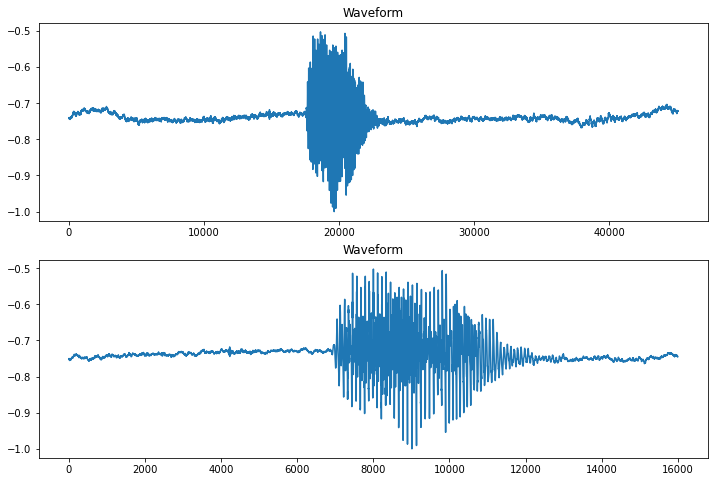

In [80]:
show_audio('test2.wav')